#Regresión polinomial


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

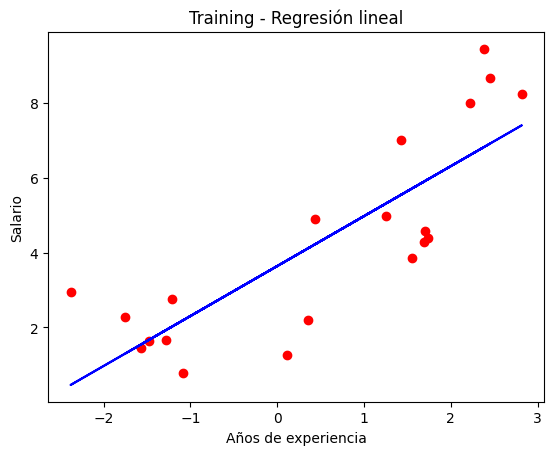

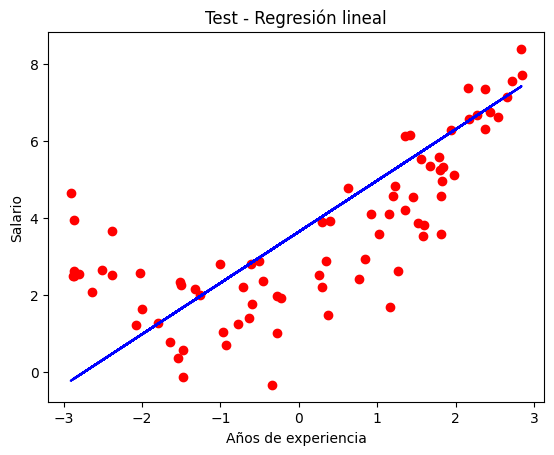

Métricas de evaluación del modelo de regresión lineal en prueba:
MSE: 2.6753868968591723
R2: 0.3741366312803487
MAE: 1.2620466193729232
RMSE: 1.635660996924232

 Métricas de evaluación del modelo de regresión lineal en entrenamiento:
MSE: 2.26048342027043
R2: -1.4344566137109274
MAE: 1.2907369963818238
RMSE: 1.5034904124304982


In [ ]:
df = pd.read_csv('complexModel.csv')
# print(df.describe)
exp=df['x']
salario=df['y']

x = np.array(exp).reshape(-1, 1)
y = np.array(salario)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.8, random_state=0)


regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)
pred_train = regressor.predict(xtrain)


plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
# plt.plot(x, y, '-g')

plt.title ("Training - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()



plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtest, pred, color = 'blue')
plt.title("Test - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()


mse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)
mae = mean_absolute_error(ytest, pred)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("Métricas de evaluación del modelo de regresión lineal en prueba:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

mse = mean_squared_error(ytrain, pred_train)
r2 = r2_score(ytrain, xtrain)
mae = mean_absolute_error(ytrain, pred_train)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("\n Métricas de evaluación del modelo de regresión lineal en entrenamiento:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)


Métricas de evaluación del modelo de regresión polinomial en prueba:
MSE: 1.5211139523909274
R2: 0.8311082181570539
MAE: 1.092040676913089
RMSE: 1.2333344852029913

Métricas de evaluación del modelo de regresión polinomial en entrenamiento:
MSE: 1.1086032541271715
R2: 0.8335898043426977
MAE: 0.8659904796447411
RMSE: 1.0529023003712983


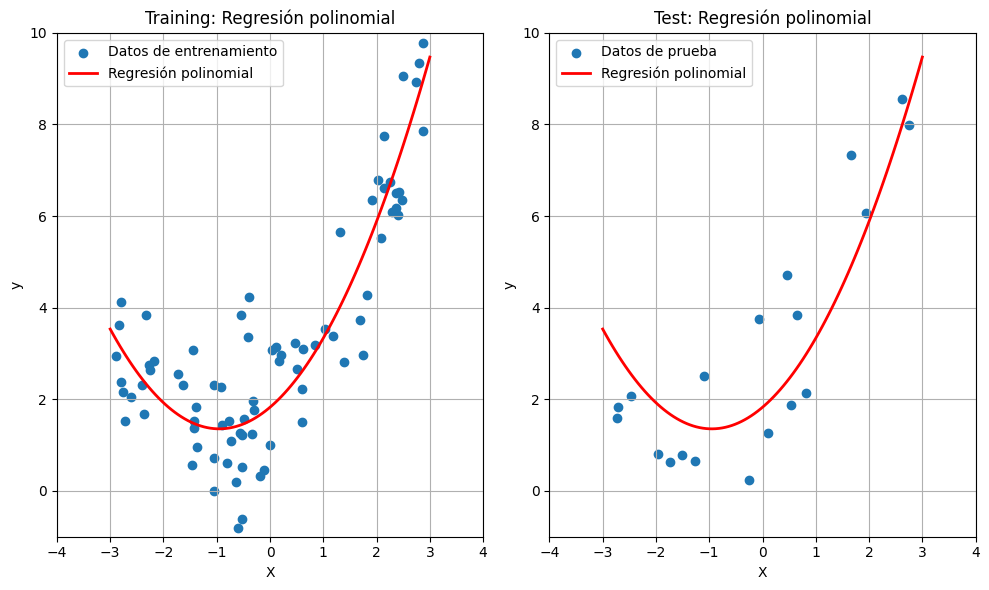

In [ ]:


m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


degree = 2 # 2,30  # Grado del polinomio


poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)


#predicciones
y_pred_test = lin_reg.predict(X_poly_test)
y_pred_train = lin_reg.predict(X_poly_train)




mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)


# Imprimir métricas para el conjunto de prueba
print("Métricas de evaluación del modelo de regresión polinomial en prueba:")
print("MSE:", mse_test)
print("R2:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

# Imprimir métricas para el conjunto de entrenamiento
print("\nMétricas de evaluación del modelo de regresión polinomial en entrenamiento:")
print("MSE:", mse_train)
print("R2:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Regresión polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training: Regresión polinomial')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-1, 10)

# Gráfica de prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Regresión polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test: Regresión polinomial')
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)
plt.ylim(-1, 10)

plt.tight_layout()
plt.show()


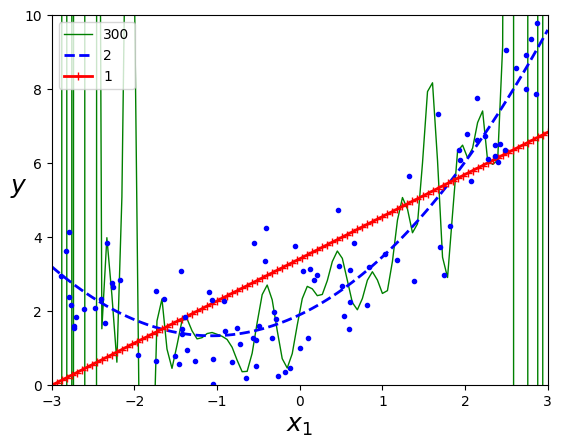

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(x, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(x, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

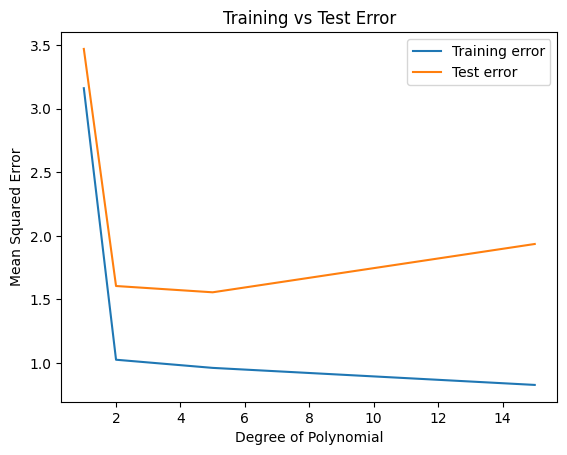

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=0)

degrees = [1, 2, 5,15]
train_errors = []
test_errors = []
models = []

for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xtrain, ytrain)
    models.append(model)

    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)

    train_error = mean_squared_error(ytrain, y_train_pred)
    test_error = mean_squared_error(ytest, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Errores de entrenamiento y prueba
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, test_errors, label='Test error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Training vs Test Error')
plt.legend()
plt.show()


Métricas de evaluación del modelo de regresión polinomial en prueba:
MSE: 0.0872266339387356
R2: 0.8212965527186896
MAE: 0.24302516095603627
RMSE: 0.2953415547103651

Métricas de evaluación del modelo de regresión polinomial en entrenamiento:
MSE: 0.05221180483768083
R2: 0.9056837682487944
MAE: 0.18439477318184452
RMSE: 0.2284990259009452


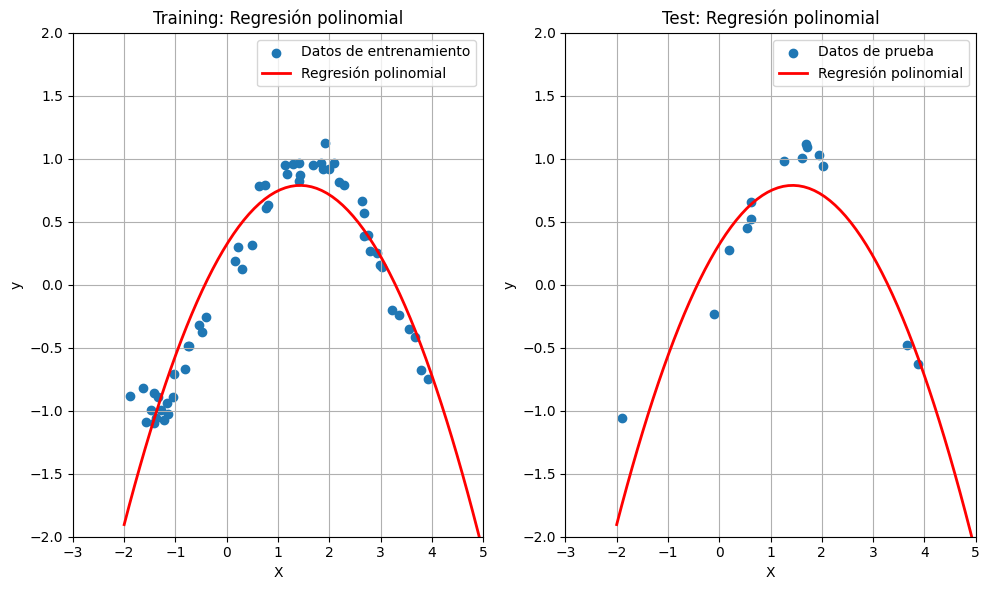

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
m = 70
x = 6 * np.random.rand(m, 1) - 2
y = np.sin(x).ravel() + np.random.randn(m) * 0.1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

degree = 2  #3,28

poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y_train)

y_pred_test = lin_reg.predict(X_poly_test)
y_pred_train = lin_reg.predict(X_poly_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

print("Métricas de evaluación del modelo de regresión polinomial en prueba:")
print("MSE:", mse_test)
print("R2:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

print("\nMétricas de evaluación del modelo de regresión polinomial en entrenamiento:")
print("MSE:", mse_train)
print("R2:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

X_new = np.linspace(-2, 5, 70).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Regresión polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training: Regresión polinomial')
plt.legend()
plt.grid(True)
plt.xlim(-3, 5)
plt.ylim(-2, 2)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Regresión polinomial')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test: Regresión polinomial')
plt.legend()
plt.grid(True)
plt.xlim(-3, 5)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 8ms/step
Métricas de evaluación del modelo de regresión polinomial en prueba:
MSE: 0.08397736220674681
R2: 0.8556551464161275
MAE: 0.23192796558404974
RMSE: 0.2897884783885426

Métricas de evaluación del modelo de regresión polinomial en entrenamiento:
MSE: 0.09043957753727631
R2: 0.8471942884411965
MAE: 0.23213362237846086
RMSE: 0.3007317368308112
2/2 [==============================] - 0s 7ms/step


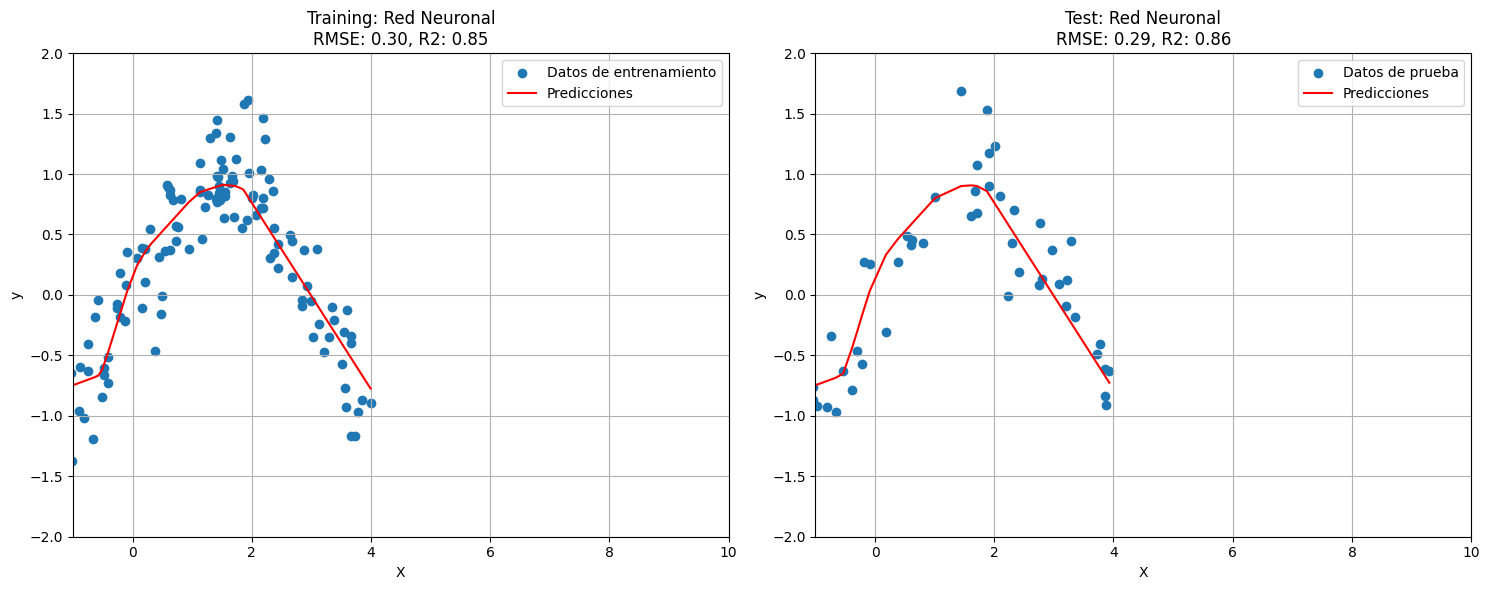

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

np.random.seed(0)
m = 200
x = 6 * np.random.rand(m, 1) -2
y = np.sin(x).ravel() + np.random.randn(m) * 0.3

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(10, activation='relu', input_shape=(1,)),
    # Dense(10, activation='relu', input_shape=(1,)),
    # Dense(10, activation='relu', input_shape=(1,)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=5, verbose=0)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

# Imprimir métricas para el conjunto de prueba
print("Métricas de evaluación del modelo de regresión polinomial en prueba:")
print("MSE:", mse_test)
print("R2:", r2_test)
print("MAE:", mae_test)
print("RMSE:", rmse_test)

# Imprimir métricas para el conjunto de entrenamiento
print("\nMétricas de evaluación del modelo de regresión polinomial en entrenamiento:")
print("MSE:", mse_train)
print("R2:", r2_train)
print("MAE:", mae_train)
print("RMSE:", rmse_train)

X_train_sorted = np.sort(X_train, axis=0)
y_pred_train_sorted = model.predict(X_train_sorted)


X_test_sorted = np.sort(X_test, axis=0)
y_pred_test_sorted = model.predict(X_test_sorted)


plt.figure(figsize=(15, 6))

# Entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, label='Datos de entrenamiento')
plt.plot(X_train_sorted, y_pred_train_sorted, color='r', label='Predicciones')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training: Red Neuronal\nRMSE: {:.2f}, R2: {:.2f}'.format(rmse_train, r2_train))
plt.legend()
plt.grid(True)
plt.xlim(-1, 10)
plt.ylim(-2, 2)

# Prueba
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='Datos de prueba')
plt.plot(X_test_sorted, y_pred_test_sorted, color='r', label='Predicciones')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Test: Red Neuronal\nRMSE: {:.2f}, R2: {:.2f}'.format(rmse_test, r2_test))
plt.legend()
plt.grid(True)
plt.xlim(-1, 10)
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()



#Regresión lineal con ruido


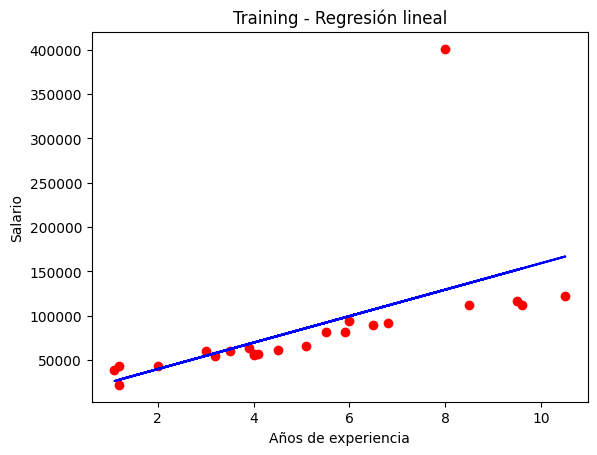

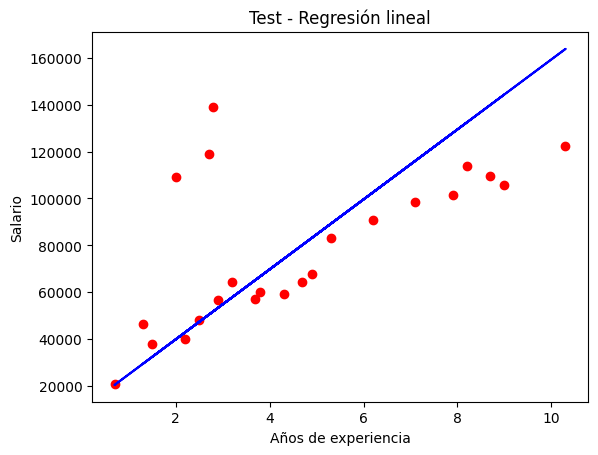

Métricas de evaluación del modelo de regresión lineal en prueba:
MSE: 1045291614.4344144
R2: -0.05527483074414641
MAE: 22346.206558634993
RMSE: 32330.969896283877

 Métricas de evaluación del modelo de regresión lineal en entrenamiento:
MSE: 3566594102.4747453
R2: -1.4363194131436186
MAE: 26819.94551319198
RMSE: 59720.968700070036


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline





df = pd.read_csv('salaryWithNoise.csv')
# print(df.describe)
exp=df['experiencia']
salario=df['salario']

x = np.array(exp).reshape(-1, 1)
y = np.array(salario)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.5, random_state=10)


regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)
pred_train = regressor.predict(xtrain)


# x = np.linspace(0, 12, 100)  # Generar 100 puntos entre -5 y 5
# m = 8433.909212174  # Pendiente
# b = 26833.427381195  # Intercepto
# y = m * x + b

plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
# plt.plot(x, y, '-g')

plt.title ("Training - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()



plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtest, pred, color = 'blue')
plt.title("Test - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()


mse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)
mae = mean_absolute_error(ytest, pred)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("Métricas de evaluación del modelo de regresión lineal en prueba:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

mse = mean_squared_error(ytrain, pred_train)
r2 = r2_score(ytrain, xtrain)
mae = mean_absolute_error(ytrain, pred_train)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("\n Métricas de evaluación del modelo de regresión lineal en entrenamiento:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)



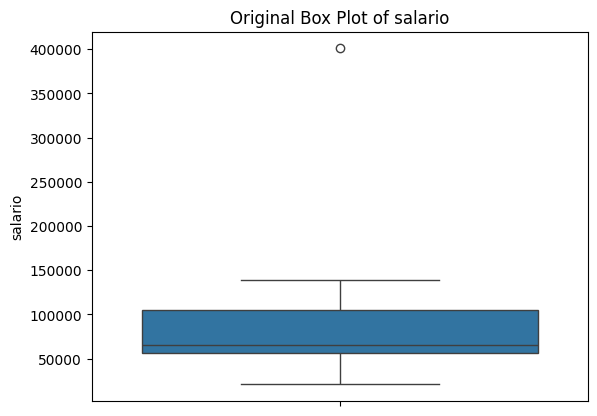

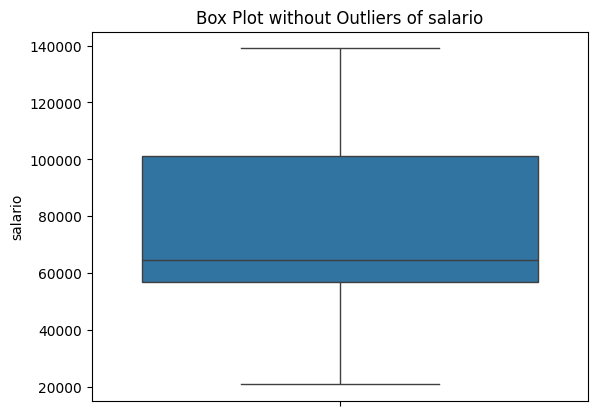

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#ver y remover outliers
def removal_box_plot(df, column, threshold):
	sns.boxplot(df[column])
	plt.title(f'Original Box Plot of {column}')
	plt.show()

	removed_outliers = df[df[column] <= threshold]

	sns.boxplot(removed_outliers[column])
	plt.title(f'Box Plot without Outliers of {column}')
	plt.show()
	return removed_outliers


threshold_value = 350000

no_outliers = removal_box_plot(df, 'salario', threshold_value)


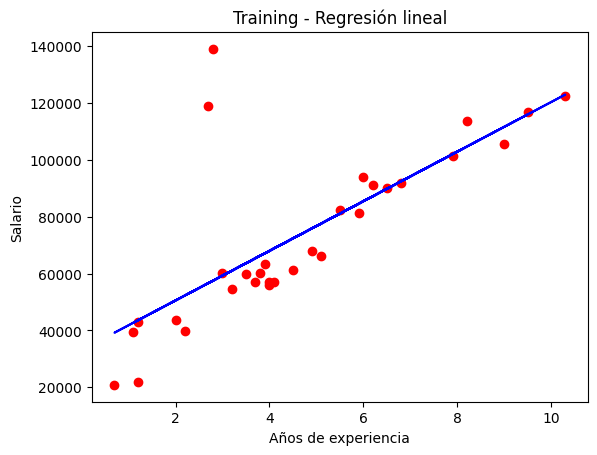

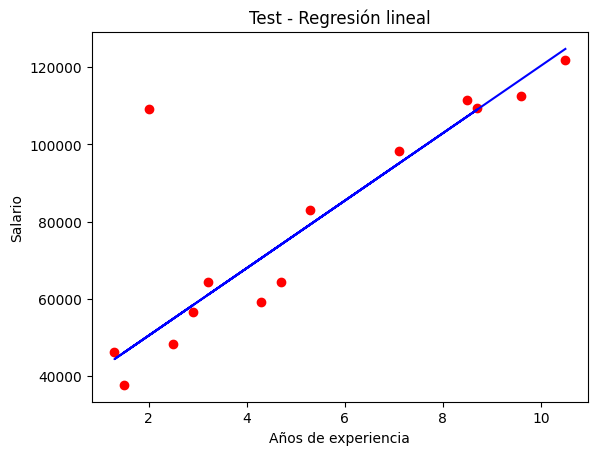

Métricas de evaluación del modelo de regresión lineal en prueba:
MSE: 275799779.8144465
R2: 0.6575665476414602
MAE: 8611.990650543357
RMSE: 16607.220713124952

 Métricas de evaluación del modelo de regresión lineal en entrenamiento:
MSE: 409205640.6816296
R2: -6.0836128895911
MAE: 10876.554077993464
RMSE: 20228.831915897408


In [ ]:
df = no_outliers
# print(df.describe)
exp=df['experiencia']
salario=df['salario']

x = np.array(exp).reshape(-1, 1)
y = np.array(salario)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.3, random_state=10)


regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

pred = regressor.predict(xtest)
pred_train = regressor.predict(xtrain)


# x = np.linspace(0, 12, 100)  # Generar 100 puntos entre -5 y 5
# m = 8433.909212174  # Pendiente
# b = 26833.427381195  # Intercepto
# y = m * x + b

plt.scatter(xtrain, ytrain, color= 'red')
plt.plot(xtrain, regressor.predict(xtrain), color = 'blue')
# plt.plot(x, y, '-g')

plt.title ("Training - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()



plt.scatter(xtest, ytest, color= 'red')
plt.plot(xtest, pred, color = 'blue')
plt.title("Test - Regresión lineal")
plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.show()


mse = mean_squared_error(ytest, pred)
r2 = r2_score(ytest, pred)
mae = mean_absolute_error(ytest, pred)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("Métricas de evaluación del modelo de regresión lineal en prueba:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

mse = mean_squared_error(ytrain, pred_train)
r2 = r2_score(ytrain, xtrain)
mae = mean_absolute_error(ytrain, pred_train)
rmse = np.sqrt(mse)

# métricas para la regresión lineal
print("\n Métricas de evaluación del modelo de regresión lineal en entrenamiento:")
print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

